<a href="https://colab.research.google.com/github/sofiadellarosa/FinalProjectDS/blob/main/DSproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import github stuff
%cd /content
!git clone https://github.com/sofiadellarosa/FinalProjectDS.git
#%cd /content/drive/MyDrive/project_files

/content
Cloning into 'FinalProjectDS'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 48 (delta 18), reused 6 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 12.02 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [3]:
import pandas as pd
import numpy as np
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
%cd /content/FinalProjectDS
!unzip hpi_at_bdl_zip5.csv.zip
!unzip DisasterDeclarationsSummaries.csv.zip

/content/FinalProjectDS
Archive:  hpi_at_bdl_zip5.csv.zip
  inflating: hpi_at_bdl_zip5.csv     
  inflating: __MACOSX/._hpi_at_bdl_zip5.csv  
Archive:  DisasterDeclarationsSummaries.csv.zip
  inflating: DisasterDeclarationsSummaries.csv  
  inflating: __MACOSX/._DisasterDeclarationsSummaries.csv  


In [44]:
disasterDeclaration_df = pd.read_csv('/content/FinalProjectDS/DisasterDeclarationsSummaries.csv') # FEMA’s Disaster Declarations Summaries
hpi_df = pd.read_csv('/content/FinalProjectDS/hpi_at_bdl_zip5.csv') #Federal Housing Finance Agency's Annual House Price Indexes

<ipython-input-44-fdc600f19364>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  disasterDeclaration_df = pd.read_csv('/content/FinalProjectDS/DisasterDeclarationsSummaries.csv') # FEMA’s Disaster Declarations Summaries
<ipython-input-44-fdc600f19364>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  hpi_df = pd.read_csv('/content/FinalProjectDS/hpi_at_bdl_zip5.csv') #Federal Housing Finance Agency's Annual House Price Indexes


# Housing Market Change after Natural Disaster

**Team Members:** Brandon Butler and Sofia Della Rosa

**Website Link:**

## Project Goal and Description:

The goal of this project is to analyze how certain natural disasters in different regions impact the housing market in the United States. We can use that information to see if property values decline after disasters and how quickly they recover. The natural disasters we will be looking at are: hurricanes, earthquake, drought, fire, flood, and tornadoes.

##Research Question:
1. How do different types of natural disasters impact housing prices in affected regions?
2. What is the average recovery time for property values to return to pre-disaster levels?

##Collaboration Plan:

For this project, we have a collaboration plan to make sure we have efficient workflow and collaboration. We meet in person every Wednesday to work on the project together. We communicate through text messages. We also use a shared Google Calendar to set up meetings and keep track of deadlines. We also set up a shared Google Drive where we store project documents and files. Inside the Google Drive is a To-Do Note file that we use to track our project tasks. Lastly, we made a GitHub repository to manage and coordinate our code efficiently.




##Table 1:

The first dataset we are working with is the Federal Housing Finance Agency's Annual House Price Indexes.

This dataset comes from the Federal Housing Finance Agency's website: https://www.fhfa.gov/data/hpi/datasets?tab=additional-data

This dataset contains House Price Index (HPI) data at the state and zip code levels. We chose this dataset because it provides a reliable measure of housing market trends over time. This will allow us to analyze how property values change in response to natural disasters and then track their recovery rates. A question we have for this dataset is how do house prices change in the years following a natural disaster? Another question is how long does it take for them to return to pre-disaster levels?

In [6]:
# ONLY RUN THIS ONCE
# hpi_df.reset_index(drop=True, inplace=True)
# col 1: Five-Digit ZIP Code
# col 2: Year
# col 3: Annual Change (%)
# col 4: HPI
# Col 5: HPI with 1990 base
# col 6: HPI with 2000 base

hpi_df = hpi_df.iloc[5:].reset_index(drop=True) # Drop the first 5 rows (index 0 to 4), which contain metadata or unwanted information
hpi_df.columns = hpi_df.iloc[0] # Set the 5th row (now at index 0) as the column headers

hpi_df = hpi_df.drop(index=0) # Drop the first row since it is now used as the header

hpi_df = hpi_df.reset_index(drop=True) # Reset the index to ensure it starts from 0

#hpi_df.head()


Put the description here

In [9]:
mean_per_year = hpi_df.groupby('Year')['HPI'].mean()
ax = mean_per_year.plot(kind='line', marker='o', color='blue', figsize=(10, 6), label='Mean HPI')

median_per_year = hpi_df.groupby('Year')['HPI'].median()
median_per_year.plot(kind='line', marker='o', color='red', ax=ax, label='Median HPI')



# Title and labels
ax.set_title('Mean and Median for Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('HPI')

# Title and labels
#ax.set_title('Mean HPI for Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('HPI')

ax.legend()

# hpi_df['Year'] = hpi_df['Year'].astype(str)
# hpi_df['HPI'] = pd.to_numeric(hpi_df['HPI'], errors='coerce') # Convert 'HPI' column to numeric, handling errors
# hpi_df.plot.scatter(x='Year', y='HPI', figsize=(10, 6))

TypeError: agg function failed [how->mean,dtype->object]

In [8]:
# Some interesting Stats
most_common_zip = hpi_df['Five-Digit ZIP Code'].mode()[0] #01106
most_common_year = hpi_df['Year'].mode()[0] #2021
#print(most_common_year)

<ipython-input-8-5d215d8eaaac>:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  most_common_zip = hpi_df['Five-Digit ZIP Code'].mode()[0] #01106


The most common Zip code is 01106 --> Make a bar chart for the different zip codes, maybe by region?
The most frequent year reported in the data is 2021 --> do the same and make a bar chart or histogram for this information


## Table 2:
The next dataset we are working with is FEMA’s Disaster Declarations Summaries.

This dataset comes from FEMA's website: https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2

This dataset lists all federally declared disasters with relevant attributes such as date, type, and duration. We chose this dataset because it provides detailed records of natural disasters. This will allow us to identify when and where disasters occurred and then analyze their impact on housing markets in affected regions. A question we have for this dataset is what types of natural disasters have the most significant and longest impact on housing prices in affected areas?


In [45]:
disasterDeclaration_df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5529-OR,5529,OR,FM,2024-08-09T00:00:00.000Z,2024,Fire,LEE FALLS FIRE,0,0,1,1,2024-08-08T00:00:00.000Z,NaN,NaN,0,41,67,99067,Washington (County),24122,NaN,2024081001,10,R,2024-08-27T18:22:14.800Z,ae87cf3c6ed795015b714af7166c7c295b2b67c7,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
1,FM-5528-OR,5528,OR,FM,2024-08-06T00:00:00.000Z,2024,Fire,ELK LANE FIRE,0,0,1,1,2024-08-04T00:00:00.000Z,NaN,NaN,0,41,31,99031,Jefferson (County),24116,NaN,2024080701,10,R,2024-08-27T18:22:14.800Z,432cf0995c47e3895cea696ede5621b810460501,59983f89-30bf-4888-b21b-62e8d57d9aac
2,FM-5527-OR,5527,OR,FM,2024-08-02T00:00:00.000Z,2024,Fire,MILE MARKER 132 FIRE,0,0,1,1,2024-08-02T00:00:00.000Z,NaN,NaN,0,41,17,99017,Deschutes (County),24111,NaN,2024080301,10,R,2024-08-27T18:22:14.800Z,2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
3,FM-5521-WA,5521,WA,FM,2024-07-26T00:00:00.000Z,2024,Fire,RETREAT FIRE,0,0,1,1,2024-07-23T00:00:00.000Z,NaN,NaN,0,53,77,99077,Yakima (County),24098,NaN,2024072601,10,R,2024-08-27T18:22:14.800Z,e205f5a4b56cadd811661c07fc8a8143b6c8c604,bc02a243-2458-4af3-84e3-b9928bd1d41d
4,FM-5520-ID,5520,ID,FM,2024-07-26T00:00:00.000Z,2024,Fire,GWEN FIRE,0,0,1,1,2024-07-25T00:00:00.000Z,NaN,NaN,0,16,0,57340,Nez Perce Indian Reservation,24099,NaN,2024072602,10,R,2024-08-27T18:22:14.800Z,ba084caa4ee18c9c0c4383346e7669d4af4ab9b7,85cccdec-5e22-436f-a3e7-acd7340172cf


In [46]:
#Drops the not needed columns since we do not need that data from the dataset
disasterDeclaration_df.drop(columns=[
    "femaDeclarationString", "disasterNumber", "ihProgramDeclared", "iaProgramDeclared",
    "paProgramDeclared", "hmProgramDeclared", "placeCode", "declarationRequestNumber",
    "lastIAFilingDate", "designatedIncidentTypes", "lastRefresh", "hash", "id",
    "tribalRequest", "fipsStateCode", "fipsCountyCode", "incidentId", "region"
], inplace=True, errors="ignore")

#Resets the index after dropping the unrevlant columns
disasterDeclaration_df = disasterDeclaration_df.reset_index(drop=True)

#Changes the columns names so they follow the same format
disasterDeclaration_df = disasterDeclaration_df.rename(columns={
    "state": "State",
    "declarationDate": "Declaration Date",
    "fyDeclared": "Fiscal Year Declared",
    "incidentType": "Incident Type",
    "declarationTitle": "Declaration Title",
    "incidentBeginDate": "Incident Begin Date",
    "incidentEndDate": "Incident End Date",
    "designatedArea": "Designated Area"
})

#Cleans the designated Area column
def clean(entry):
    if pd.isna(entry):
        return entry
    return entry.lower().replace(" (county)", "").strip()

disasterDeclaration_df['Designated Area'] = disasterDeclaration_df['Designated Area'].apply(clean)

#Replaces empty or invalid values with NaN so we can get rid of NaN values later on
def replaceNan(entry):
    entry = str(entry).strip()
    if entry in ["–", '="0"', '="0.00"', "", "nan"]:
        return np.nan
    return entry

#Apply NaN replacement to all columns
for col in disasterDeclaration_df.columns:
    disasterDeclaration_df[col] = disasterDeclaration_df[col].apply(replaceNan)

#Drops all rows containing NaN values since we are not looking at rows with nan values
disasterDeclaration_df.dropna(inplace=True)

#Resets the index after dropping NaN rows
disasterDeclaration_df = disasterDeclaration_df.reset_index(drop=True)

#Displays the cleaned data
disasterDeclaration_df.head()

,State,declarationType,Declaration Date,Fiscal Year Declared,Incident Type,Declaration Title,Incident Begin Date,Incident End Date,disasterCloseoutDate,Designated Area
0,NM,FM,2022-04-30T00:00:00.000Z,2022,Fire,CALF CANYON FIRE,2022-04-20T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,san miguel
1,NM,FM,2022-04-28T00:00:00.000Z,2022,Fire,COOK'S PEAK FIRE,2022-04-28T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,colfax
2,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,NOGAL CANYON FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,lincoln
3,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,MCBRIDE FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,lincoln
4,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,HERMIT'S PEAK FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-20T00:00:00.000Z,san miguel


This dataset can be used to answer the research question by obtaining different types of natural disaster events with their relevant information. We can use this dataset to see when and where a natural disaster occurs. Then we can use the House Price Index dataset to see how housing pricing changes in those areas before, after, and during the natural disaster.

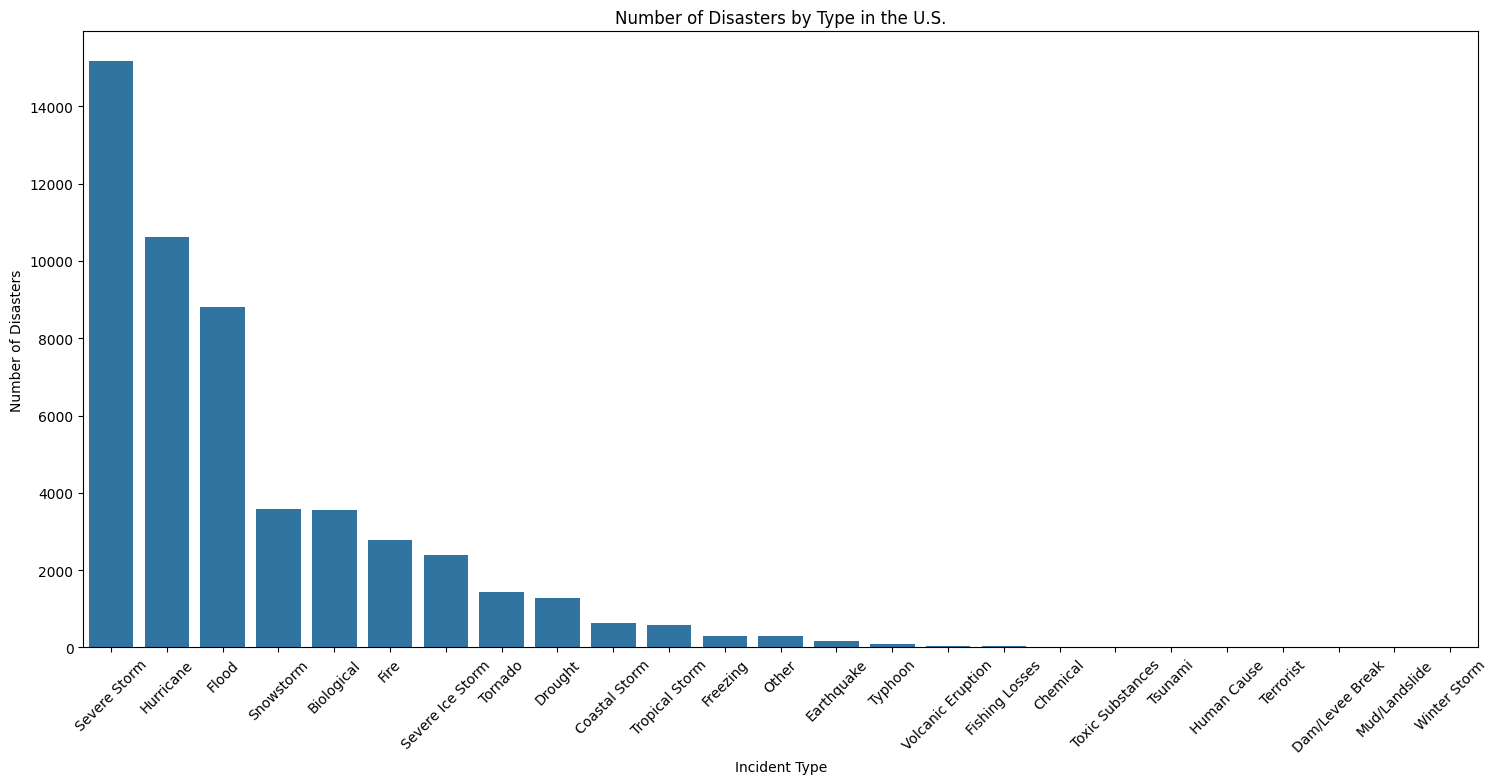

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

#Gets the number of disasters by the incident type
disasterCounts = disasterDeclaration_df["Incident Type"].value_counts()

#Bar graph of each of the number of disater by types
plt.figure(figsize=(18, 8))
sns.barplot(x=disasterCounts.index, y=disasterCounts.values)
plt.xticks(rotation=45)
plt.xlabel("Incident Type")
plt.ylabel("Number of Disasters")
plt.title("Number of Disasters by Type in the U.S.")
plt.show()

Summary Statistics:
1. Severe storms are the highest reported disaster type in the U.S. from the dataset. Severe storms have over 15,000 occurrences.
2. The three most common disaster types are severe storms, hurricanes, and floods. Each of these natural disasters have over 8,000 occurrences.
3. Winter Storms, mudslides, dam/levee breaks are the natural disasters that have the least amount of occurrences.
4. More than 70% of all recorded disasters from the dataset are storm related disasters which include: Severe storm, hurricanes, floods, and snow storms.

These statistics review frequency levels of natural disasters to see which occur the most.

The data shows that weather related events (storms, hurricanes, floods) are the highest occuring and recorded natural disasters in the FEMA’s Disaster Declarations Summaries, while geological disasters (earthquakes, volcanic eruptions, tsunamis) do not occur as often.

This is relevant to the research question because it shows which types of natural disasters occur the most frequently and have the greatest potential impact on the housing market.

In [ ]:
# # np="/content/drive/MyDrive/project_files/DSproject.ipynb"
# # print(np)

# %%shell
# jupyter nbconvert --to html "/content/drive/MyDrive/project_files/DSproject.ipynb"